#  Project: Diabetes Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection & Analysis

In [3]:
 #loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
#Frequency distribution of Outcome variable
#Number of instances(rows) that belong to each class
#Size() is used for displaying number of rows associated with each value of target variable
diabetes_dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [7]:
#Display the count of unique values in Outcome
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0--> Non-Diabetic people


1--> Diabetic people

In [8]:
#mean value for outcome
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<function matplotlib.pyplot.show(close=None, block=None)>

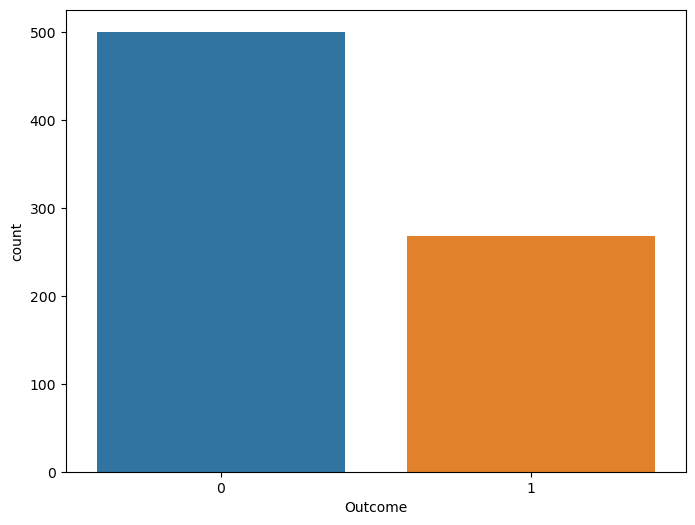

In [9]:
#Visualizing the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="Outcome", data=diabetes_dataset)
plt.show


In [10]:
#Frequency distribution of target variable w.r.t different features
#Frequency distribution of target variable w.r.t pregnancies feature
#How many males and females are with diabetes and without diabetes
diabetes_dataset.groupby('Pregnancies')['Outcome'].value_counts()

Pregnancies  Outcome
0            0           73
             1           38
1            0          106
             1           29
2            0           84
             1           19
3            0           48
             1           27
4            0           45
             1           23
5            0           36
             1           21
6            0           34
             1           16
7            1           25
             0           20
8            1           22
             0           16
9            1           18
             0           10
10           0           14
             1           10
11           1            7
             0            4
12           0            5
             1            4
13           0            5
             1            5
14           1            2
15           1            1
17           1            1
Name: count, dtype: int64

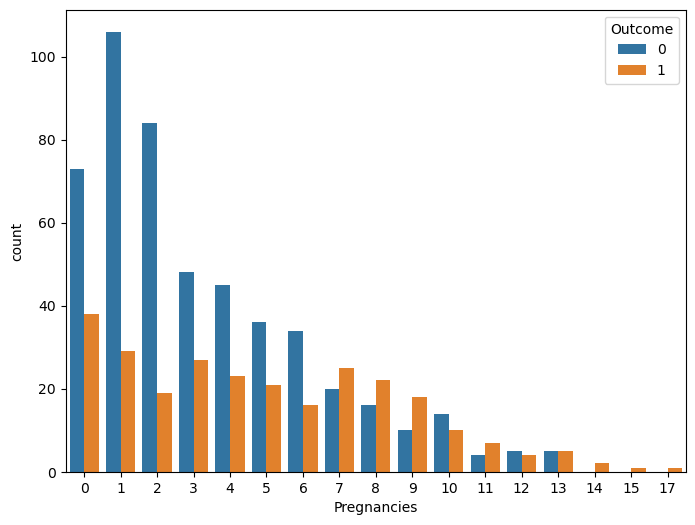

In [11]:
#Visualizing count of the 'Pregnencies' variable w.r.t target
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="Pregnancies", hue="Outcome", data= diabetes_dataset)
plt.show()


In [12]:
#Another way
#ax = sns.catplot(x="Outcome", col="Pregnancies", data=diabetes_dataset, kind="count", height=5, aspect=1)

# Findings of the univariate analysis 


In [13]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# getting information about features and their datatypes
diabetes_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
#Analyzing the Outcome Variable
diabetes_dataset["Outcome"].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

# Bivariate Analysis

In [16]:
#Corelation between features and target
print(diabetes_dataset.corr())["Outcome"].sort_values(ascending)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

TypeError: 'NoneType' object is not subscriptable

In [46]:
#Analysis of Glucose and target variable
diabetes_dataset['Glucose'].nunique()


136

In [47]:
#Freuency distribution of Glucose
diabetes_dataset['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

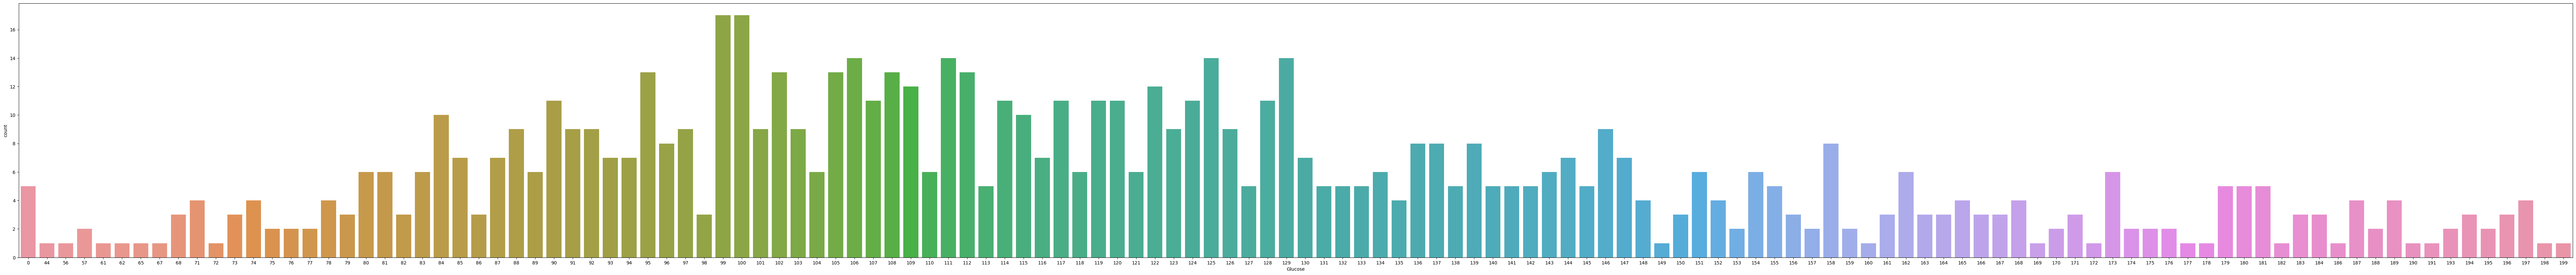

In [48]:
#Visualize the frequency distribution
f, ax = plt.subplots(figsize=(100,10))
ax = sns.countplot(x="Glucose", data=diabetes_dataset)
plt.show()

In [49]:
#Frequency distribution of target vaiable w.r.t Glucose
diabetes_dataset.groupby('Glucose')['Outcome'].value_counts()

Glucose  Outcome
0        0          3
         1          2
44       0          1
56       0          1
57       0          2
                   ..
196      1          3
197      1          3
         0          1
198      1          1
199      1          1
Name: count, Length: 215, dtype: int64

In [50]:
#Analysis of BMI and target variable
diabetes_dataset['BMI'].nunique()


248

In [51]:
#Freuency distribution of BMI
diabetes_dataset['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

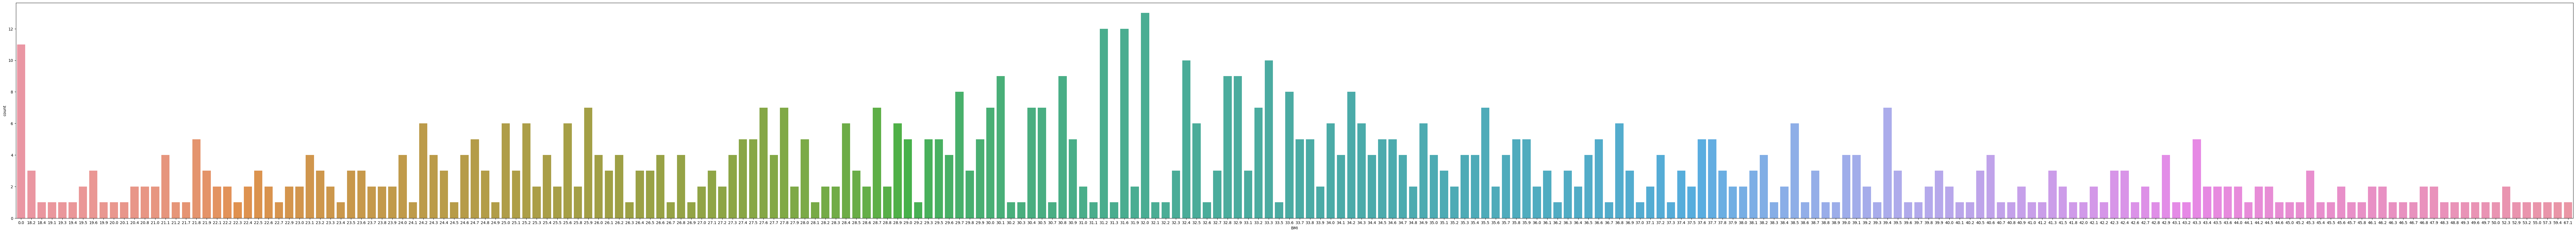

In [52]:
#Visualize the frequency distribution
f, ax = plt.subplots(figsize=(118,10))
ax = sns.countplot(x="BMI", data=diabetes_dataset)
plt.show()

In [53]:
#Frequency distribution of target vaiable w.r.t BMI
diabetes_dataset.groupby('BMI')['Outcome'].value_counts()

BMI   Outcome
0.0   0          9
      1          2
18.2  0          3
18.4  0          1
19.1  0          1
                ..
53.2  1          1
55.0  1          1
57.3  0          1
59.4  1          1
67.1  1          1
Name: count, Length: 358, dtype: int64

# Multivariate Analysis

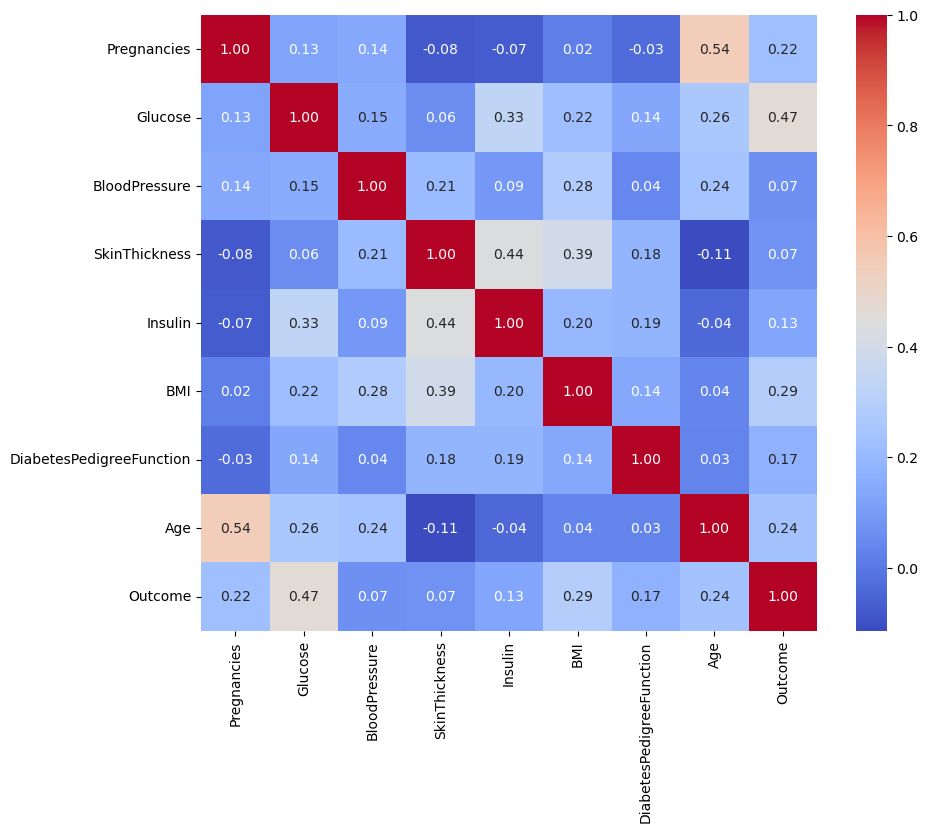

In [54]:

# Multivariate Analysis are performed to discover patterns and relationsip in the dataset
#Heatmap to show correlation between features vs heart---
# Compute correlation matrix
correlation_matrix = diabetes_dataset[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr()

# Create a heatmap with annotations
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.show()

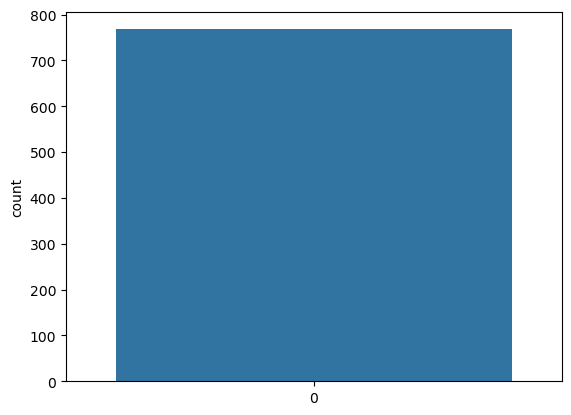

Outcome
0    500
1    268
Name: count, dtype: int64


In [55]:
#Analyzing individual features wrt target
y = diabetes_dataset["Outcome"]
sns.countplot(y)
plt.show()
outcome_values = diabetes_dataset.Outcome.value_counts()
print(outcome_values)

In [56]:
#Analysing the sex feature
diabetes_dataset["Age"].unique()


array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

<Axes: xlabel='Age', ylabel='Count'>

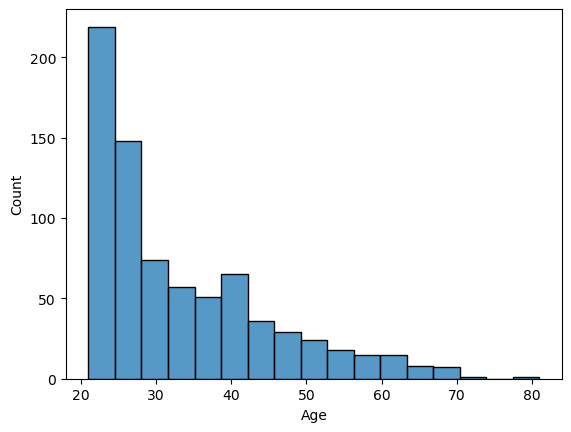

In [57]:
sns.histplot(diabetes_dataset["Age"])

In [58]:
diabetes_dataset["Insulin"].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

<Axes: xlabel='Insulin', ylabel='Count'>

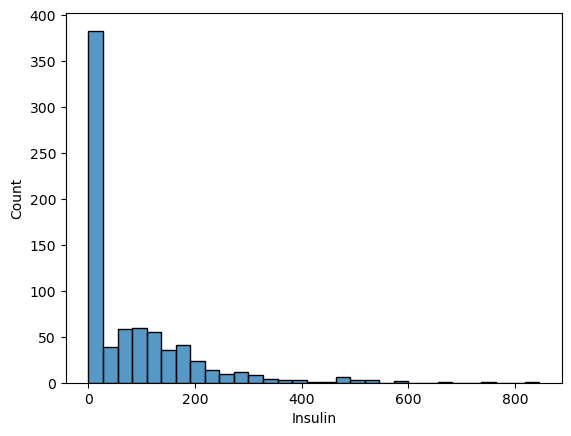

In [59]:
sns.histplot(diabetes_dataset["Insulin"])

In [60]:
#Analysing the Glucose feature
diabetes_dataset["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

<Axes: >

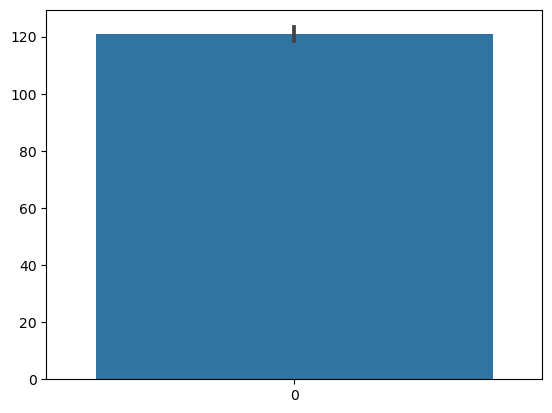

In [61]:
sns.barplot(diabetes_dataset["Glucose"])

<Axes: xlabel='Glucose', ylabel='Count'>

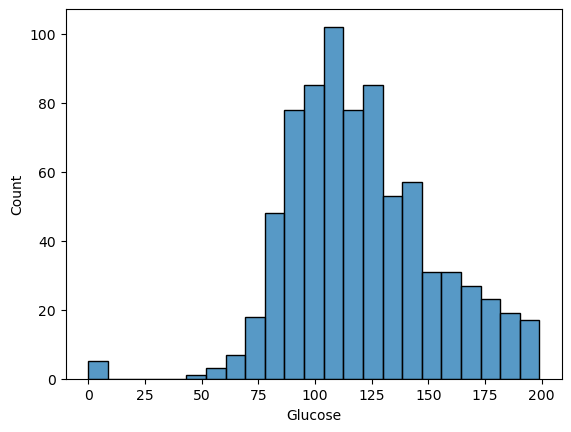

In [62]:
sns.histplot(diabetes_dataset["Glucose"])

# Data Preprocessing

 Separating data into features (X) and labels (Y) is necessary for training supervised machine learning models. Features are used as input for training the model, and labels represent the desired output. This division is fundamental for the model to learn relationships between inputs and outputs during training and make predictions on new data.

In [63]:
#Separating the data and labels
X=diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y=diabetes_dataset["Outcome"]

In [64]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [65]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standarization

we have pregnancies ,insulin,glucose,bloodpressure columns and each column have values in difffenet ranges like pregnancies are between 1-10 and Glucose column has values between 100-150 range so its become difficullt for machine learning model to learn because of diffrent ranges that's why we have to standerize our data

In [66]:
#Creating an instance of StandardScalar class of preproceesing module of sklrean library
scaler=StandardScaler()

The fit method computes the mean (μ) and standard deviation (σ) of each feature in the training data. This step is crucial because it determines how the transformation (standardization in this case) will be applied. Essentially, fit "learns" the parameters needed for the transformation.

In [67]:
scaler.fit(X)

StandardScaler()

The transform method applies the learned transformation to the data. It subtracts the mean and divides by the standard deviation for each feature, standardizing the data according to the Z-score formula.

In [68]:
standarized_data = scaler.transform(X)

In [69]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


By standardizing the data, you bring all features to a common scale, typically with a mean of 0 and a standard deviation of 1. This ensures that each feature contributes equally to the model's learning process. 

In [70]:
#Assignign Standarized data to X
X=standarized_data

In [71]:
#Assining Labeles to the Y (Already done above)
Y=diabetes_dataset["Outcome"]

In [72]:
#Now X has Standarized data
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

The train-test split is a critical step in machine learning to evaluate the performance of a model. It involves dividing the dataset into training and testing sets.
## Need:
It allows us to assess how well the model generalizes to new, unseen data. Without a separate test set, the model might perform well on the data it was trained on but poorly on new data (overfitting).

### train_test_split is a function of model_selection(module of Sckit-learn library)
             
#### X and y: Features and labels, respectively, representing the dataset to be split.
#### test_size: Specifies the proportion of the dataset to include in the test split (e.g., test_size=0.2 for 20% testing).
#### random_state: Sets a seed for random number generation, ensuring reproducibility.
#### stratify: Maintains the distribution of classes in classification tasks during the split.

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state=5)

In [74]:
#Lets Compare the shape of dataset noe after spliting it in testing and training data separately
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of Y_Test:"+str(Y_test.shape))

Shape of X_Train:(691, 8)
Shape of y_Train:(691,)
Shape of X_Test:(77, 8)
Shape of Y_Test:(77,)


# Training the Model

## Support Vector Machine

This line of code sets up a Support Vector Machine (SVM) classifier with a linear kernel. SVM is a tool for learning patterns in data, and a linear kernel means it looks for a straight-line separation between different groups. This is useful for tasks like classification, where the goal is to categorize data points accurately

In [75]:
classifier = svm.SVC(kernel='linear')

This line of code trains the Support Vector Machine (SVM) classifier using labeled training data. The `fit` method adjusts the model's parameters based on the input features (`X_train`) and corresponding labels (`Y_train`). Essentially, it teaches the SVM to create an optimal decision boundary that separates different classes in the training set, allowing the model to make accurate predictions on new, unseen data.

In [76]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

## Accuracy Score

In [77]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [78]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7858176555716353


In [79]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [80]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


## Logistic Regression

In [81]:
# 5- Model fitting
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [83]:
Y_pred_lr.shape

(77,)

In [84]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr))


The accuracy score achieved using Logistic Regression is: 75.32


In [85]:
#Confusion matrix and classification report
print(confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_test,Y_pred_lr))


[[44 13]
 [ 6 14]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        50
           1       0.70      0.52      0.60        27

    accuracy                           0.75        77
   macro avg       0.74      0.70      0.71        77
weighted avg       0.75      0.75      0.74        77



## Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [87]:
Y_pred_nb.shape

(77,)

In [88]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes "+str(score_nb)+"%")


The accuracy score achieved using Naive Bayes 72.73%


##  K nearest Neighbors 

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [90]:
Y_pred_knn.shape

(77,)

In [91]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy achieved using KNN is: "+str(score_knn)+"%")


The accuracy achieved using KNN is: 76.62%


## Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_test, Y_pred_dt), 2)  # Fix here
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)


In [93]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy achieved using Desicion Tree is: "+str(score_dt)+"%")

The accuracy achieved using Desicion Tree is: 75.32%


# Make a Predictive System

In [94]:
print(X_test)

[[ 0.04601433  0.25367803  0.87340925 -0.03365099  1.65149133  0.39439164
  -0.72747502 -0.87137393]
 [-0.84488505  0.03459802 -0.26394125  0.71908574  0.66164119  0.39439164
   0.66479969 -0.27575966]
 [-0.84488505 -0.05929342 -1.29789624  1.66000666 -0.14586813  0.44515934
  -0.5794892  -0.70119842]
 [-0.54791859 -0.65393918 -0.16054575 -0.03365099  0.08857006  0.1151693
   1.19332046 -0.44593516]
 [ 1.23388019  1.88112959 -0.05715025  0.96999799  3.60514291 -0.24020459
   0.43225055  2.27687294]
 [-0.54791859 -1.43636781 -0.26394125  0.21726125 -0.2153313  -0.29097229
  -0.30767852 -0.0204964 ]
 [-1.14185152 -0.09059057  0.77001375  1.66000666  1.30417549  1.75242756
   0.23896296 -0.19067191]
 [ 0.63994726 -0.49745345  0.56322275  0.4681735  -0.69289057  0.0644016
   1.22654177 -0.61611067]
 [ 3.31264542  0.47275805  0.04624525  0.71908574  0.26222798  0.64823013
  -0.96304428  0.83038113]
 [-0.84488505 -0.46615631  0.04624525  0.4681735   0.47930038  0.28016432
  -0.99626558 -0.95

In [95]:
input_data = (1,147,94,41,0,49.3,0.358,27)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505  0.81702665  1.28699125  1.28363829 -0.69289057  2.19664492
  -0.34391995 -0.53102292]]
[1]
The person is diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
